## 넷플릭스 시청기록 분석

In [2]:
input_data = {'watchData': [['Column1', 'genre'], ['0', '액션'], ['1','코미디']]}

In [28]:
def create_df(input_data):
    csv_name = list(input_data.keys())[0]
    return pd.DataFrame(input_data['{}'.format(csv_name)][1:], columns=input_data['{}'.format(csv_name)][0])

In [29]:
create_df(input_data)

,Column1,genre
0,0,액션
1,1,코미디


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv("raw_data/NetflixViewingHistory.csv")
data.head()

,Title,Date
0,투 핫!: 시즌 2: 그린 라이트 다음은? 뜨거운 밤!,21. 12. 27.
1,투 핫!: 시즌 2: 돈이 줄줄,21. 12. 27.
2,투 핫!: 시즌 2: 우정보단 남자,21. 12. 27.
3,투 핫! 브라질: 시즌 1: 신의 혹은 배반,21. 12. 27.
4,투 핫! 브라질: 시즌 1: 이건 몰랐지?,21. 12. 27.


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%y. %m. %d.')

In [6]:
title = []
series = []
subtitle = []


for i in range(data.shape[0]):
    split_list = data['Title'].iloc[i].split(':')
    if len(split_list) == 1:
        title.append(split_list[0])
        series.append(np.nan)
        subtitle.append(np.nan)
    elif len(split_list) == 2:
        title.append(split_list[0])
        series.append(split_list[1])
        subtitle.append(np.nan)
    else:
        title.append(split_list[0])
        series.append(split_list[1])
        subtitle.append(split_list[2])

In [7]:
data['Title'] = title
data['SubTitle'] = subtitle
data['Series'] = series

In [8]:
data.head()

,Title,Date,SubTitle,Series
0,투 핫!,2021-12-27,그린 라이트 다음은? 뜨거운 밤!,시즌 2
1,투 핫!,2021-12-27,돈이 줄줄,시즌 2
2,투 핫!,2021-12-27,우정보단 남자,시즌 2
3,투 핫! 브라질,2021-12-27,신의 혹은 배반,시즌 1
4,투 핫! 브라질,2021-12-27,이건 몰랐지?,시즌 1


In [9]:
prep_data = data

> title은 "투 핫!" 이고 시즌만 달라야 하는데,, 왜 title도 다를까......... \
해결 방법: 나중에 영화 테이블과 title을 비교해서 장르를 가져올 때, contains 포함하는지 여부로 확인

> 정주행을 다 하는 편인지 아닌지도 분석해주면 좋을 것 같다는 생각


### 날짜 별 시청 내역


In [10]:
# 최근 1년 간 ? 월 별? 일일?
today = datetime.today().date()
before_one_year = pd.to_datetime(today - relativedelta(years=1))

In [14]:
before_one_year.strftime('%Y-%m-%d')

'2021-01-08'

In [11]:
recent_year_data = data[data['Date']<= before_one_year]
recent_year_grp = recent_year_data.groupby(['Date'])['Title'].count()

In [25]:
recent_year_grp.index[0].strftime('%Y-%m-%d')

'2020-02-12'

In [28]:
date_list = []
for d in list(recent_year_grp.index):
    date_list.append(d.strftime('%Y-%m-%d'))

In [29]:
date_list

['2020-02-12',
 '2020-02-19',
 '2020-02-22',
 '2020-02-26',
 '2020-03-09',
 '2020-03-16',
 '2020-03-18',
 '2020-03-28',
 '2020-04-11',
 '2020-04-13',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-27',
 '2020-04-30',
 '2020-05-11',
 '2020-06-01',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-10',
 '2020-06-12',
 '2020-06-13',
 '2020-06-14',
 '2020-06-17',
 '2020-06-20',
 '2020-06-29',
 '2020-07-05',
 '2020-07-14',
 '2020-07-28',
 '2020-08-05',
 '2020-08-20',
 '2020-08-21',
 '2020-08-30',
 '2020-09-21',
 '2020-10-26',
 '2020-11-07',
 '2020-11-29',
 '2020-12-06',
 '2020-12-10']

In [18]:
[d.index.strftime('%Y-%m-%d') for d in list(recent_year_grp.index)]

AttributeError: 'Timestamp' object has no attribute 'index'

In [51]:
def count_by_date(data):
    # 최근 1년 간 ? 월 별? 일일?
    today = datetime.today().date()
    before_one_year = pd.to_datetime(today - relativedelta(years=1))

    recent_year_data = data[data['Date']<= before_one_year]
    recent_year_grp = recent_year_data.groupby(['Date'])['Title'].count()

    return recent_year_grp.index, recent_year_grp.values

In [52]:
date, viewing_cnt = count_by_date(data)

In [53]:
date, viewing_cnt

(DatetimeIndex(['2020-02-12', '2020-02-19', '2020-02-22', '2020-02-26',
                '2020-03-09', '2020-03-16', '2020-03-18', '2020-03-28',
                '2020-04-11', '2020-04-13', '2020-04-16', '2020-04-17',
                '2020-04-18', '2020-04-27', '2020-04-30', '2020-05-11',
                '2020-06-01', '2020-06-04', '2020-06-05', '2020-06-06',
                '2020-06-10', '2020-06-12', '2020-06-13', '2020-06-14',
                '2020-06-17', '2020-06-20', '2020-06-29', '2020-07-05',
                '2020-07-14', '2020-07-28', '2020-08-05', '2020-08-20',
                '2020-08-21', '2020-08-30', '2020-09-21', '2020-10-26',
                '2020-11-07', '2020-11-29', '2020-12-06', '2020-12-10'],
               dtype='datetime64[ns]', name='Date', freq=None),
 array([3, 2, 1, 2, 2, 1, 1, 1, 4, 2, 3, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 5,
        5, 5, 4, 1, 1, 8, 2, 1, 1, 1, 9, 1, 1, 2, 1, 1, 1, 3]))

In [3]:
list(date)

NameError: name 'date' is not defined

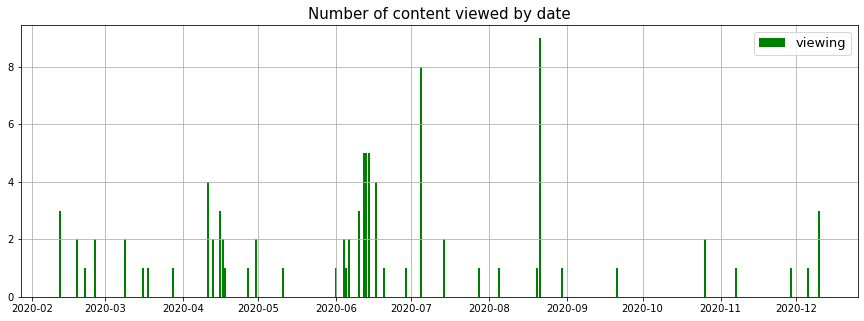

In [49]:
plt.figure(figsize=(15,5))
plt.title("Number of content viewed by date", fontsize=15)
plt.bar(recent_year_grp.index, recent_year_grp.values, color='green', label='viewing')
plt.grid()
plt.legend(fontsize=13)
# plt.xticks(rotation=90)
plt.show()

## 많이 본 장르

In [32]:
contents = pd.read_csv("raw_data/content_no_Korean.csv")

In [33]:
merge_df = pd.merge(contents, prep_data, left_on='title', right_on='Title', how='inner')

In [34]:
merge_df.head()

,Unnamed: 0,title,type,open_year,rate,running_time,genre1,genre2,genre3,actor,director,summary,Title,Date,SubTitle,Series
0,0,모가디슈,Movie,2021,7.9,2시간 1분,드라마,액션,스릴러,"Kim Yoon-seok, Jo In-sung, Heo Joon-ho, Kim So...",Ryoo Seung-wan,유엔 가입을 위해 다수의 투표권을 지닌 아프리카 대륙에서 열심히 외교 활동을 벌이던...,모가디슈,2021-12-24,NaN,NaN
1,97,아가씨,Movie,2016,8.9,2시간 24분,스릴러,드라마,로맨스,"Kim Min-hee, Kim Tae-ri, Ha Jung-woo, Cho Jin-...",Park Chan-wook,어릴 적 부모를 잃고 후견인 이모부의 보호 아래 살아가는 귀족 아가씨에게 백작이 추...,아가씨,2021-04-01,NaN,NaN
2,116,기생충,Movie,2019,9.4,2시간 13분,드라마,코미디,스릴러,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Bong Joon-ho,전원 백수로 살 길 막막하지만 사이는 좋은 기택 가족. 장남 기우에게 명문대생 친구...,기생충,2021-09-14,NaN,NaN
3,121,암수살인,Movie,2018,7.2,1시간 51분,범죄,드라마,NaN,"Kim Yoon-seok, Ju Ji-hoon, Moon Jeong-hee, Jin...",Kim Tae-gyoon,수감된 살인범 강태오는 형사 김형민에게 추가 살인을 자백한다. 형사의 직감으로 자백...,암수살인,2020-04-30,NaN,NaN
4,139,추격자,Movie,2008,8.5,2시간 4분,스릴러,액션,범죄,"Kim Yoon-seok, Ha Jung-woo, Seo Young-hee, Kim...",Na Hong-jin,출장안마소를 운영하는 전직 형사 중호. 최근 데리고 있던 여자들이 잇달아 사라지는 ...,추격자,2021-05-17,NaN,NaN


In [35]:
merge_df.groupby('genre1').size()

genre1
RealityTV    13
SF           43
다큐멘터리         1
드라마          59
로맨스           3
범죄            4
스릴러          14
액션           39
코미디          28
판타지           1
dtype: int64

## 많이 본 인물

In [36]:
actor_list = []
for i in range(merge_df.shape[0]):
    try:
        actor_list += merge_df.actor[i].split(', ')
    except:
        continue

In [39]:
from collections import Counter
top10_actor = Counter(actor_list).most_common(1000)

In [40]:
top10_actor

[('Aoi Morikawa', 28),
 ('Taishi Nakagawa', 28),
 ('Yurika Nakamura', 28),
 ('Natsume Mito', 28),
 ('Ruka Matsuda', 28),
 ('Kiyo Matsumoto', 28),
 ('Minami Tanaka', 28),
 ('Ayaka Fukuhara', 28),
 ('Mariya Ise', 28),
 ('Tomokazu Sugita', 28),
 ('Karin Nanami', 28),
 ('Yuuki Wakai', 28),
 ('Hiro Shimono', 27),
 ('Yoshitsugu Matsuoka', 26),
 ('Kim Da-mi', 18),
 ('Son Ye-jin', 17),
 ('Hyun Bin', 16),
 ('Seo Ji-hye', 16),
 ('Jeon Kuk Hwan', 16),
 ('Jung Ae-ri', 16),
 ('Ha Seok-jin', 16),
 ('Kwon Na-ra', 15),
 ('Park Seo-jun', 14),
 ('You Chea-myung', 14),
 ('Ahn Bo-hyun', 14),
 ('Kim Dong-hee', 14),
 ('Daishi Kajita', 13),
 ('Kousuke Oonishi', 13),
 ('Takeo Otsuka', 13),
 ('Yohei Hamada', 13),
 ('Ai Kayano', 13),
 ('Jun Kasama', 13),
 ('Chase Demoor', 9),
 ('Carly Lawrence', 9),
 ('Melinda Melrose', 9),
 ('Marvin Anthony', 9),
 ('Nathan Webb', 9),
 ('Larissa Townson', 9),
 ('', 7),
 ('Ha Jung-woo', 5),
 ('Choi Woo-shik', 5),
 ('Aoi Yuki', 5),
 ('Jo In-sung', 4),
 ('Song Kang-ho', 4),
 ('Ju 

In [108]:
from googletrans import Translator
translator = Translator()

actor_kor = []
actor_cnt = []
for actor, cnt in top10_actor:
    actor_kor.append((translator.translate(actor, dest='ko').text, cnt))
    # actor_cnt

In [109]:
actor_kor

[('블루 모리 카와', 28),
 ('강을 가져 가라', 28),
 ('백합 부서 나카무라', 28),
 ('맛과', 28),
 ('마쓰다', 28),
 ('기여 마쓰모토', 28),
 ('미나미 타나카', 28),
 ('아야카 후쿠하라', 28),
 ('마리아 그것', 28),
 ('tomomi.', 28)]

## 영화랑 tv쇼 비중

In [1]:
import WatchHistoryAnalysis

In [113]:
merge_df.groupby(['type']).size()

type
Movie       45
TV_Show    160
dtype: int64

In [2]:
list([3, 2, 1])

[3, 2, 1]

In [30]:
int([3, 2, 1])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'